20.12.2020

### Image Processing in Physics
#### Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiss

# Exercise 7: Fresnel propagation

Perform near-field wavefront propagation.
Check your Figures against the lecture notes!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "none"

The problem: We apply a monochromatic plane wave to an object with a
complex-valued amplitude transmission function.
We then calculate what the "shadow" of the object looks like
at certain downstream distances.

Note: In this case, the TUM logo is not only changing the amplitude (pinhole),
but also the phase (e.g. like a piece of glass). 

![title](geometry_fresnel.png)

Parameters:

In [2]:
psize = 10e-6     # Detector pixel size: 10 micrometer
wlen = 600e-9     # Wavelength: 600 nm (= visible light)
prop_dist = 3e-3  # Propagation distance: 3 mm

Propagate wave to detector. The wave is influenced by aperture magnitude. Wave is a complex wave field. Fresnel Approximation: wavefield hitting the detector is of parabolic shape, not spherical (Huygens), hence the propagation integral of the convolution of the aperture function with the Fresnel kernel. 

## A) Create the wavefield at $z=0$

Read in test wavefield from image:

In [13]:
img = plt.imread('tum.png')

Sum/mean the color channels and scale to $[0, 1]$.

In [14]:
img = img.mean(-1)
img /= img.max()
img.shape


(1024, 1024)

Look at the image. We will use it to create different wavefronts at $z = 0$.

<IPython.core.display.Javascript object>


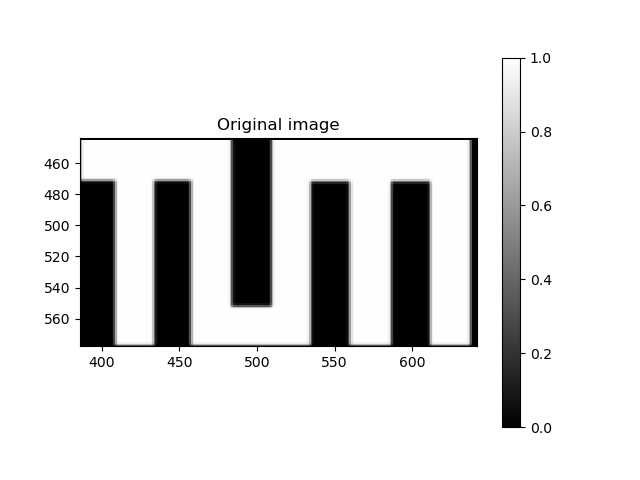

In [15]:
plt.figure()
plt.imshow(img)
plt.title("Original image")
plt.colorbar()

Generate a **pure phase wavefield** from `img`, spanning from $0$ to $\pi$.

I.e.: the nonzero parts of ``img`` should apply a phase shift of $\pi$,
the remaining part of the image should apply no phase shift.

The absolute value (magnitude) of the phase field you create should be $1$,
meaning that no part of `img` attenuates the beam.

In [18]:
w = np.exp(1.j * np.pi * img)

Have a look at the phase and magnitude of `w`:

<IPython.core.display.Javascript object>


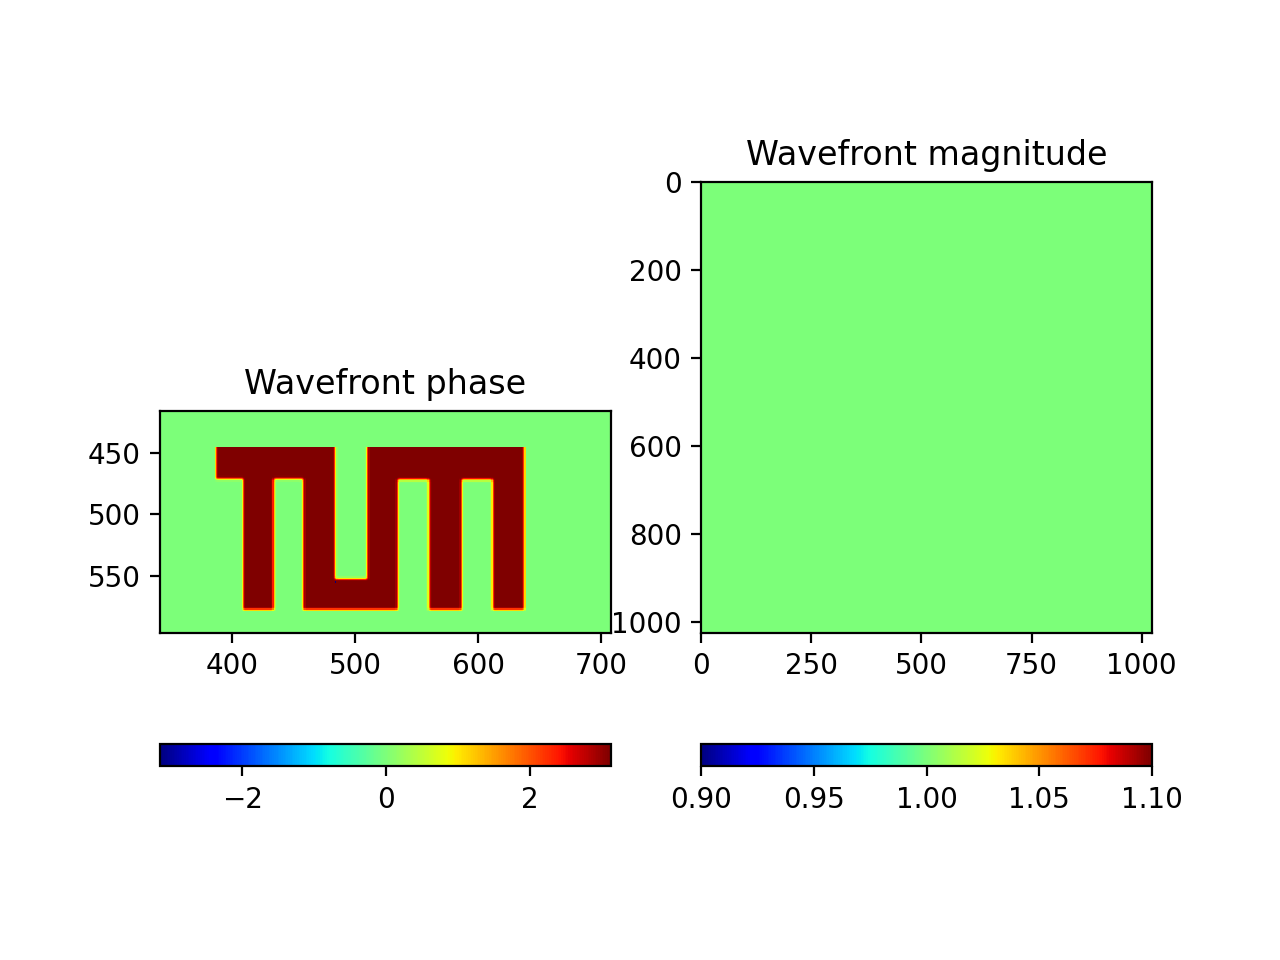

In [19]:
plt.figure()
plt.subplot(121)
plt.title('Wavefront phase')
plt.imshow(np.angle(w), cmap='jet')
plt.colorbar(orientation="horizontal")
plt.subplot(122)
plt.title('Wavefront magnitude')
plt.imshow(np.abs(w), cmap='jet', vmin=.9, vmax=1.1)
plt.colorbar(orientation="horizontal")

## B) Generate the Fresnel kernel

Generate grids for Fourier-domain kernel:

In [21]:
u = 2. * np.pi * np.fft.fftfreq(img.shape[1], psize)
v = 2. * np.pi * np.fft.fftfreq(img.shape[0], psize)

uu, vv = np.meshgrid(u, v, indexing='xy')

Calculate the wave number:

In [22]:
k = 2*np.pi/wlen

Generate the kernel:

In [24]:
kernel = np.exp((-1.j*prop_dist)/(2*k)*(uu**2+vv**2))

## C) Calculate and examine the near-field diffraction pattern

Calculate the propagated wave array:

In [25]:
out = np.fft.ifft2(np.fft.fft2(w)*kernel) #input and output are both complex, since wave is complex

Plot the phase of the kernel. We use the periodic colormap `hsv` to have a continuous transition from $-\pi$ to $\pi$.

<IPython.core.display.Javascript object>


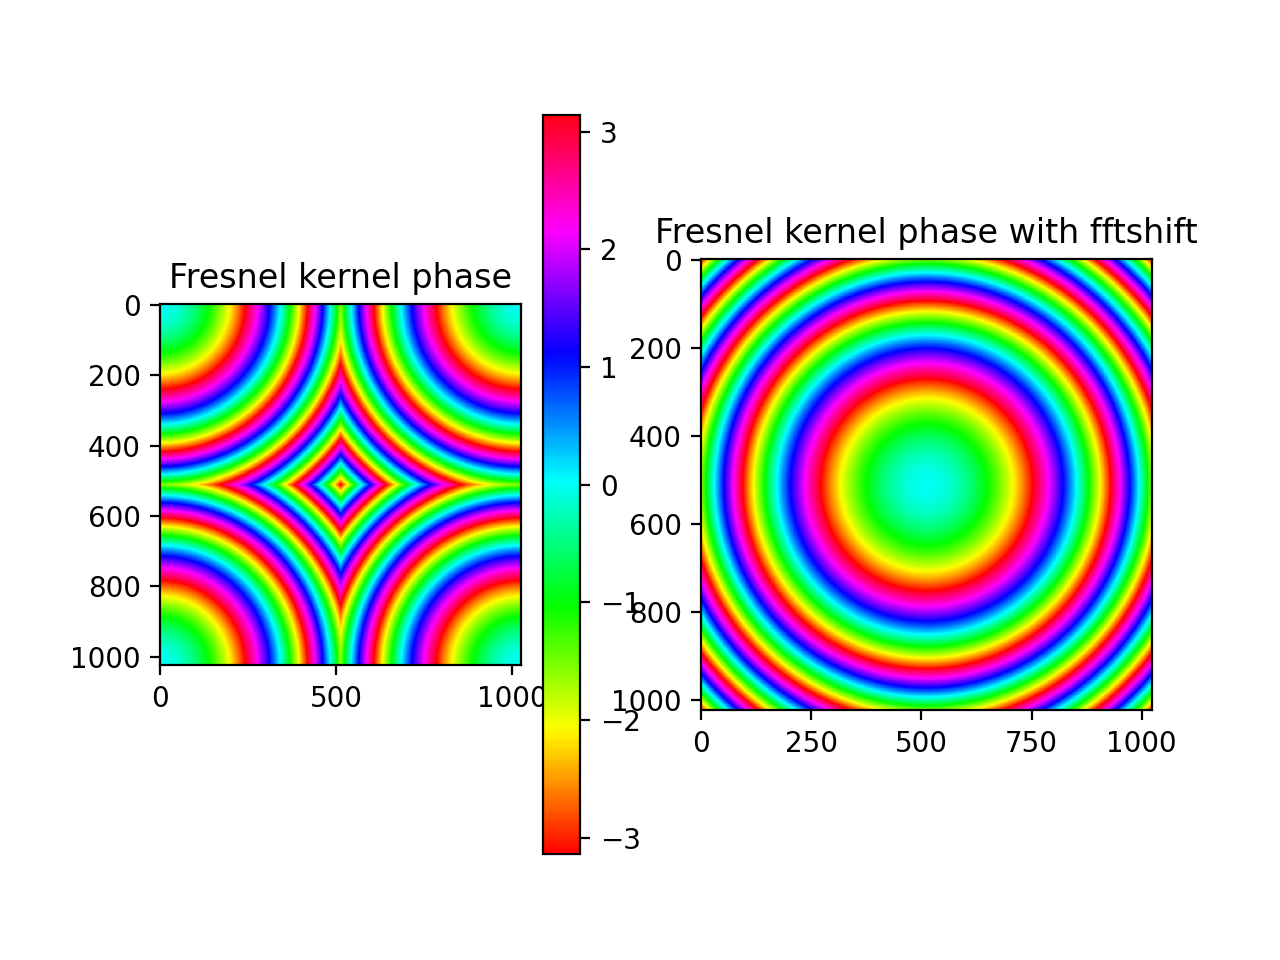

Text(0.5, 1.0, 'Fresnel kernel phase with fftshift')

In [33]:
plt.figure()
plt.subplot(121)
plt.imshow(np.angle(kernel), cmap='hsv')
plt.title('Fresnel kernel phase')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.fft.fftshift(np.angle(kernel)), cmap='hsv')
plt.title('Fresnel kernel phase with fftshift')


Calculate the intensity from the propagated wave array:

Fresnel zones, radially symmetric because of the use of the squared distance. kernel is representation of parabolic wavefront at detector plane. 

In [34]:
I = np.abs(out)**2

Plot the propagated intensity (zoomed in to the center of the image):

<IPython.core.display.Javascript object>


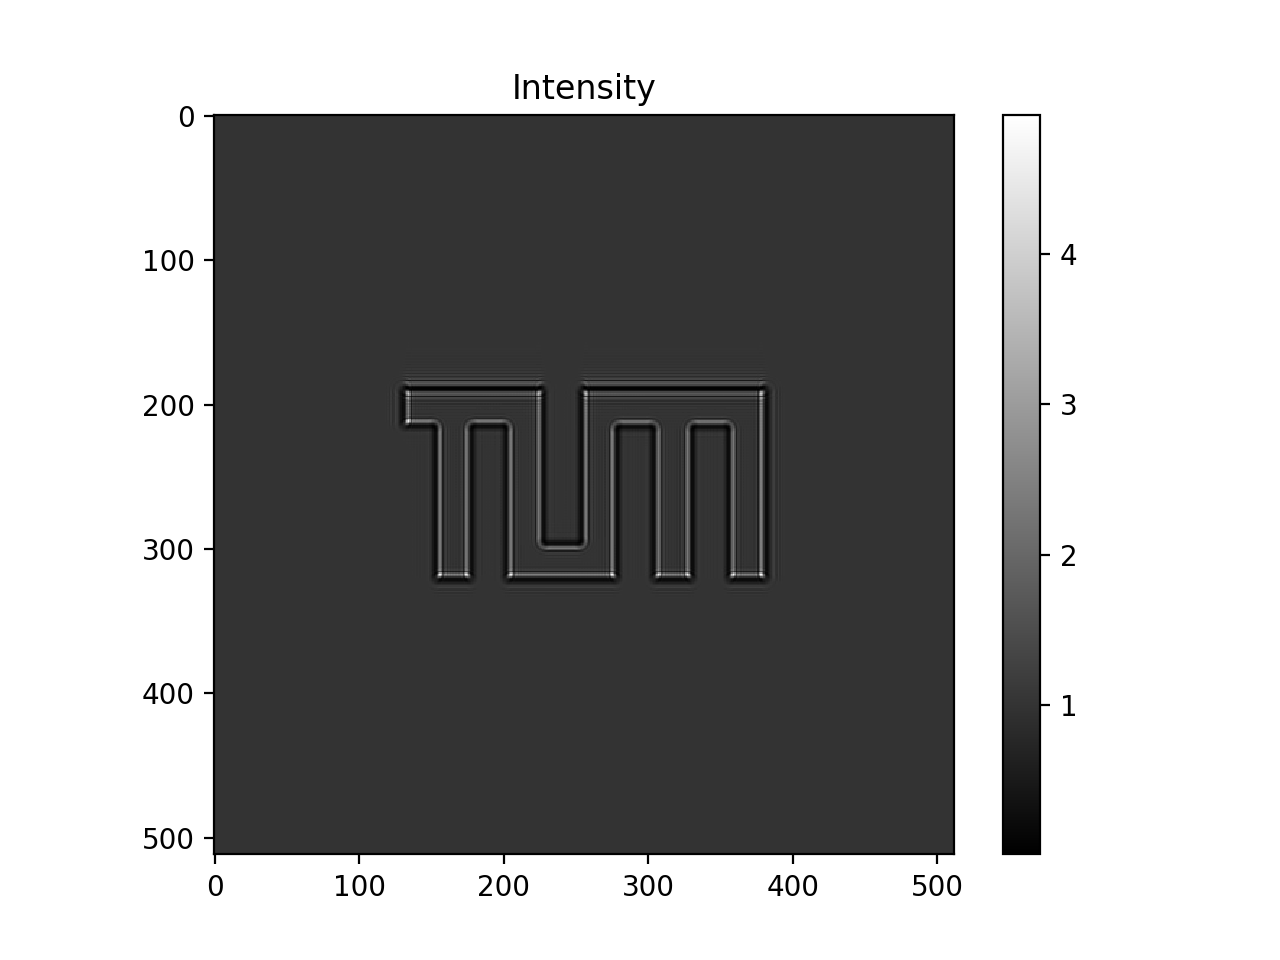

In [35]:
plt.figure()
plt.imshow(I[256:768,256:768])
plt.title('Intensity')
plt.colorbar()

## D) Calculate near field for pure amplitude and mixed amplitude-phase object

Now we want to compute the near-field pattern for a purely absorbing object and a object with both amplitude and phase. 

First, generate the pure amplitude wavefront. We want magnitude $1$ where the TUM logo is, $0$ everywhere else.

In [41]:
w_mag = img

Additionally, generate a wavefront with both intensity and phase modulated. We want you to combine the effects of the two previous wavefronts.

In [42]:
w_mag_phase = w_mag*w #from slide 28 G(x,y,z) = G(x,y,z)*e^-i*theta(x,y,z)

Visualize phase and magnitude of the new wave fields.

<IPython.core.display.Javascript object>


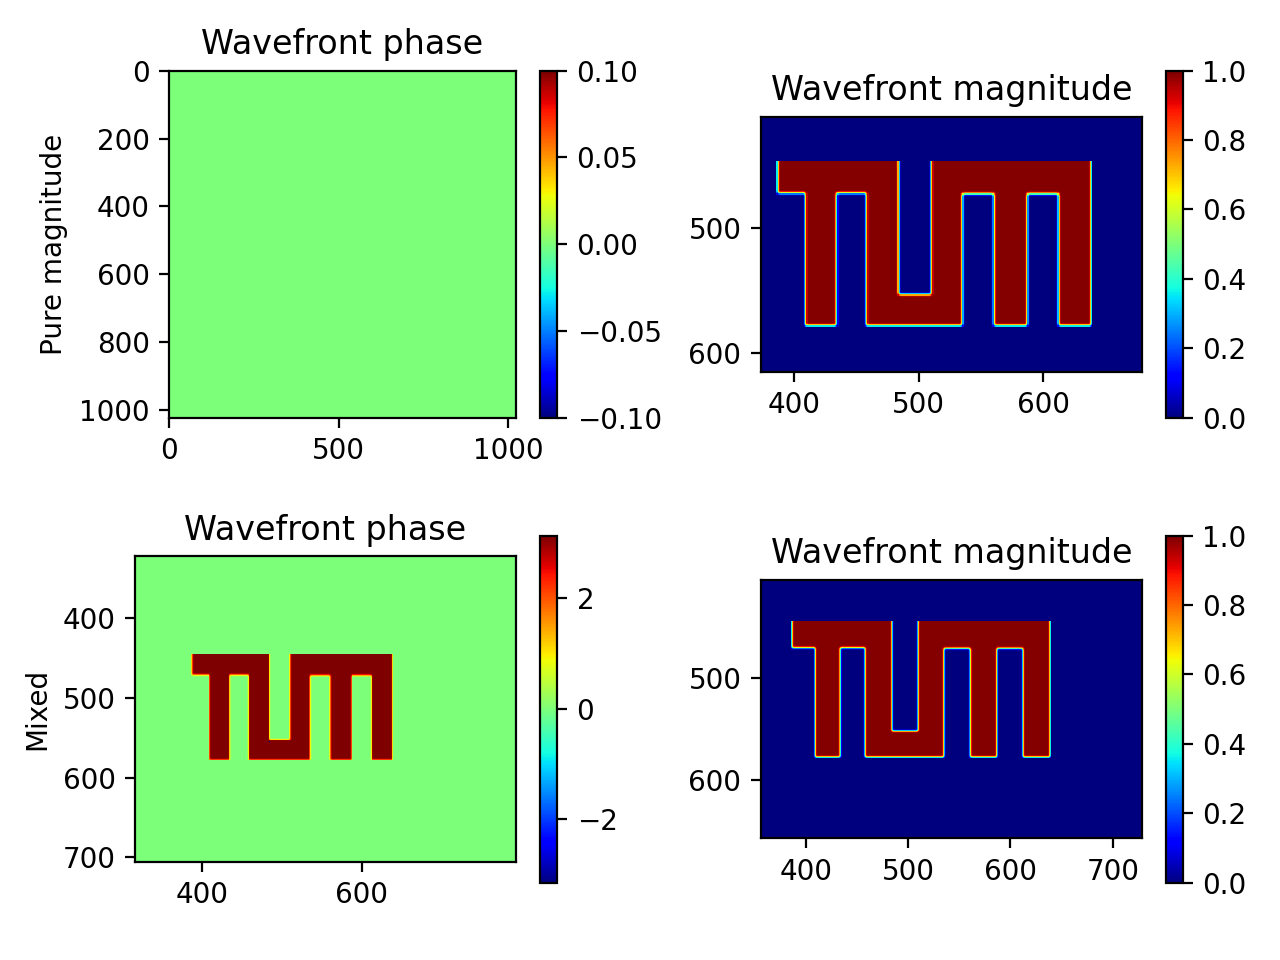

In [43]:
plt.figure()
plt.subplot(221)
plt.title('Wavefront phase')
plt.imshow(np.angle(w_mag), cmap='jet')
plt.colorbar()
plt.ylabel("Pure magnitude")
plt.subplot(222)
plt.title('Wavefront magnitude')
plt.imshow(np.abs(w_mag), cmap='jet')
plt.colorbar()
plt.subplot(223)
plt.title('Wavefront phase')
plt.imshow(np.angle(w_mag_phase), cmap='jet')
plt.colorbar()
plt.ylabel("Mixed")
plt.subplot(224)
plt.title('Wavefront magnitude')
plt.imshow(np.abs(w_mag_phase), cmap='jet')
plt.colorbar()
plt.tight_layout()

Apply Fresnel propagation by using the propagation kernel on the new wavefronts.

In [46]:
out_mag = np.fft.ifft2(np.fft.fft2(w_mag)*kernel #propagated magnitude wavefront
out_mag_phase = np.fft.ifft2(np.fft.fft2(w_mag_phase)*kernel) #propagated mixed wavefront

I_mag = np.abs(out_mag)**2
I_mag_phase = np.abs(out_mag_phase)**2

Visualize the intensity of the propagated wavefronts. 

We see that also a pure magnitude waveform creates an interference pattern. For mixed magnitude/phase, it's a combination of both.

<IPython.core.display.Javascript object>


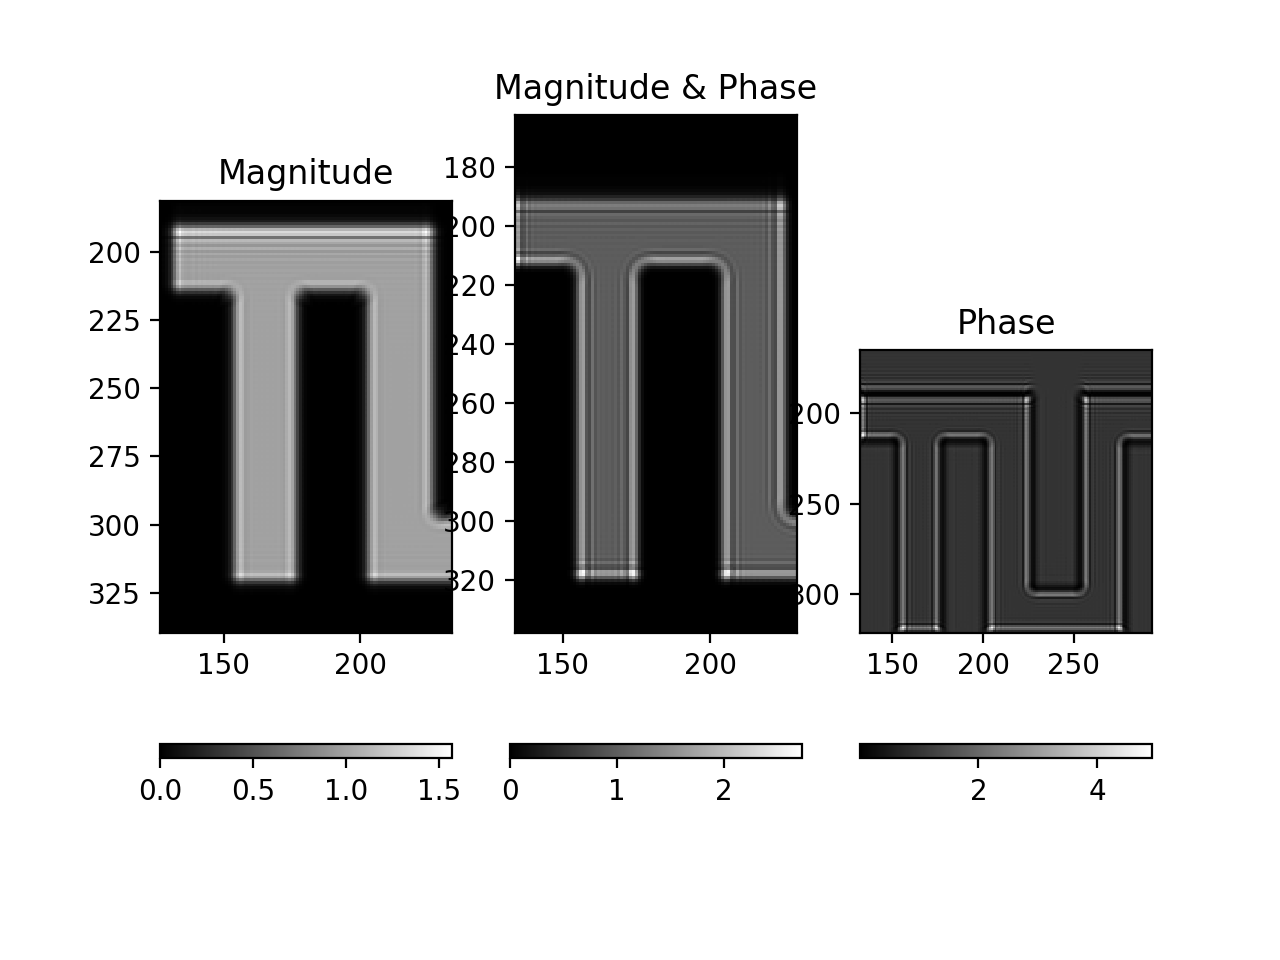

In [50]:
plt.figure()
plt.subplot(131)
plt.imshow(I_mag[256:768,256:768])
plt.title('Magnitude')
plt.colorbar(orientation="horizontal")
plt.subplot(132)
plt.imshow(I_mag_phase[256:768,256:768])
plt.title('Magnitude & Phase')
plt.colorbar(orientation="horizontal")
plt.subplot(133)
plt.imshow(I[256:768,256:768])
plt.title('Phase')
plt.colorbar(orientation="horizontal")

## E) Try other propagation distances

Finally, we propagate the original pure-phase wavefront for two larger distances.

In [51]:
prop_dist_medium = 1e-1  # 10 cm
prop_dist_large = 1e1    # 10 m

Compute the kernels for the new distances.

In [55]:
kernel_medium = np.exp(-1.j*prop_dist_medium/(2.*k)*(uu**2+vv**2))
kernel_large = np.exp(-1.j*prop_dist_large/(2.*k)*(uu**2+vv**2))

Visualize the new kernels by looking at their phase. Zoom in (in interactive mode) to identify aliasing!

<IPython.core.display.Javascript object>


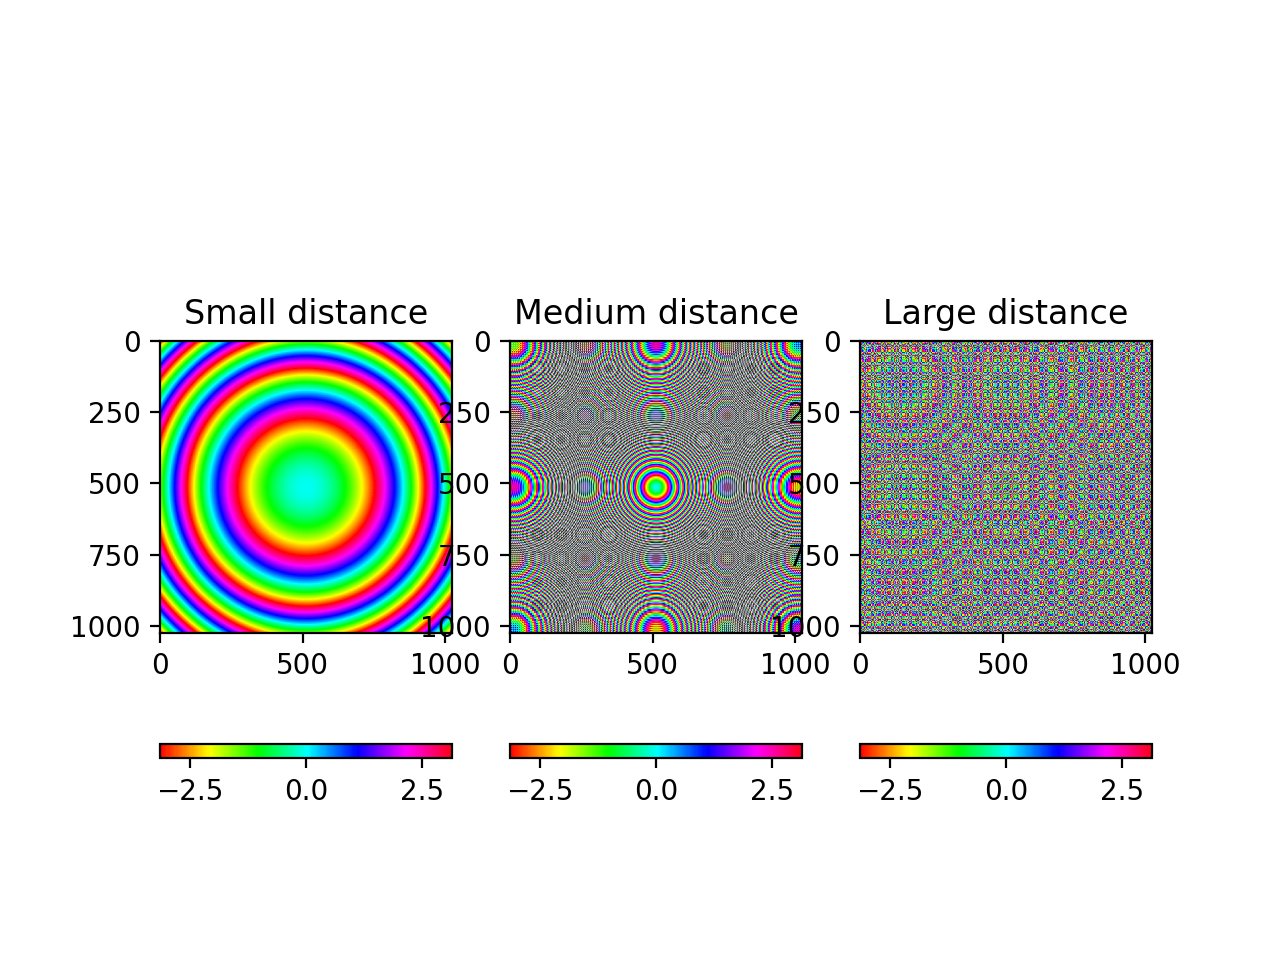

In [57]:
plt.figure()
plt.subplot(131)
plt.imshow(np.fft.fftshift(np.angle(kernel)), cmap='hsv')
plt.title('Small distance')
plt.colorbar(orientation="horizontal")
plt.subplot(132)
plt.imshow(np.fft.fftshift(np.angle(kernel_medium)), cmap='hsv')
plt.title('Medium distance')
plt.colorbar(orientation="horizontal")
plt.subplot(133)
plt.imshow(np.fft.fftshift(np.angle(kernel_large)), cmap='hsv')
plt.title('Large distance')
plt.colorbar(orientation="horizontal")


MD: smaller Fresnel zones, and secondary Fresnel zones.
LD: Huge amount of Fresnel zones

Propagate the pure-phase wavefront `w` (from the beginning) by the medium and large distances and compute the resulting intensities.

In [58]:
out_medium = np.fft.ifft2(np.fft.fft2(w)*kernel_medium)
out_large = np.fft.ifft2(np.fft.fft2(w)*kernel_large)

I_medium = np.abs(out_medium)**2
I_large = np.abs(out_large)**2

<IPython.core.display.Javascript object>


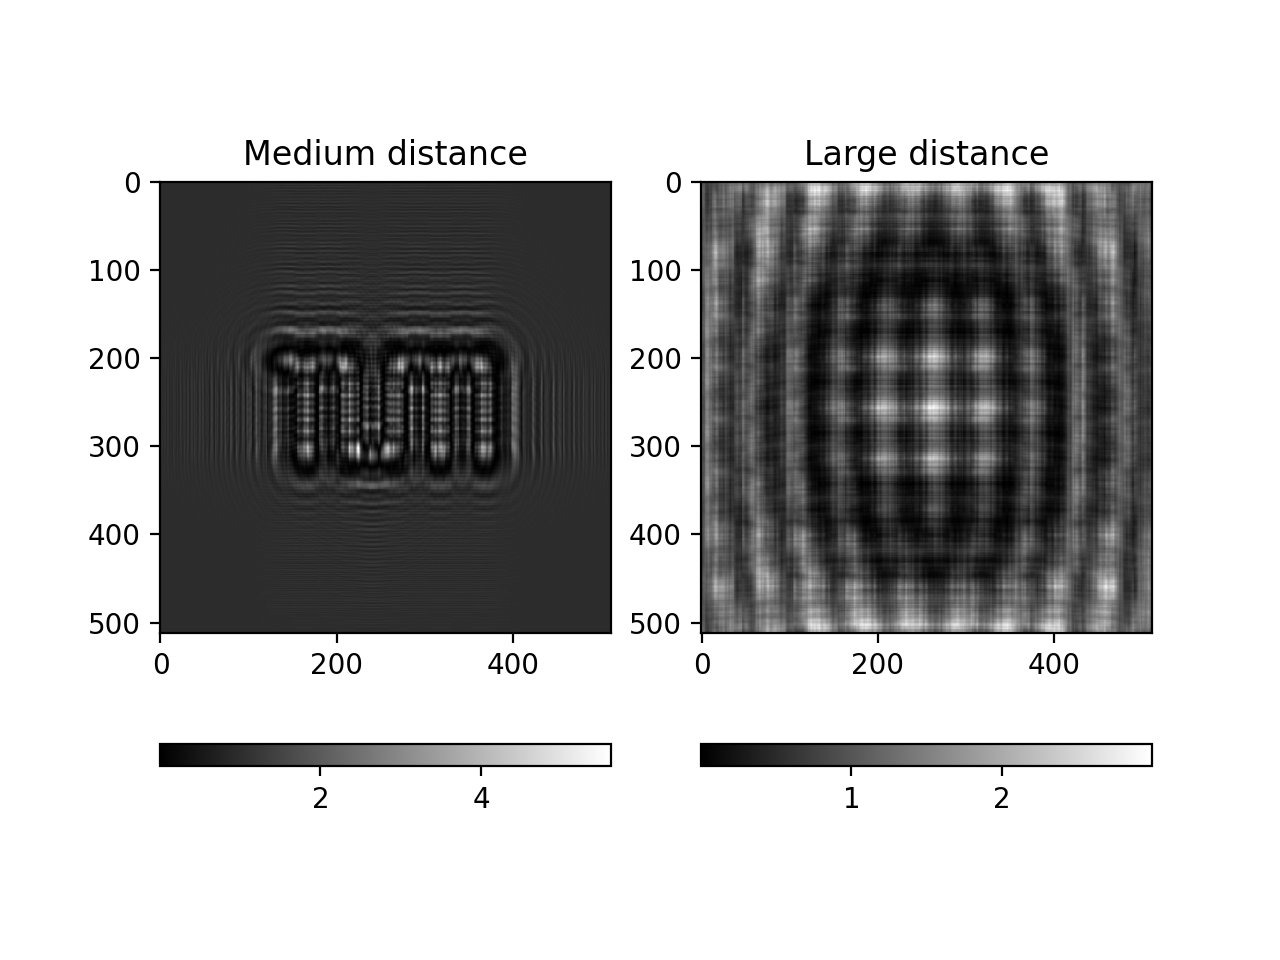

Text(0.5, 1.0, 'Large distance')

In [59]:
plt.figure()
plt.subplot(121)
plt.imshow(I_medium[256:768,256:768])
plt.colorbar(orientation="horizontal")
plt.title("Medium distance")
plt.subplot(122)
plt.imshow(I_large[256:768,256:768])
plt.colorbar(orientation="horizontal")
plt.title("Large distance")

MD_ :more ripples (and stronger, moving out from letters)
LD_ :TUM logo not visible anymore. Eventhough Fresnel propagation is valid for all propagation distances, when using the simple convolution (Fourier multiplication), computationally the result is not correct, since the simulated area is not large enough to incorporate all interference effects. The ripples reach edge of array and interfere back, producing a wrong results, hence take larger detectors if we increase distance. 

## E) Fresnel numbers

Compute the Fresnel number for all propagation distances. 

First, fill in the general function for the Fresnel number. Then estimate the aperture size by the extent of the TUM logo in pixels and the pixel size. Finally, use the function for the three propagation distances.

In [61]:
def F(a, lambd, z):
    """\
    Compute the Fresnel number from aperture size `a`, wavelength `lambd`
    and propagation distance `z`.
    """
    return a**2/lambd*z

aperture_size = 200*psize

F_close = F(aperture_size, wlen, prop_dist)
F_medium = F(aperture_size, wlen, prop_dist_medium)
F_large = F(aperture_size, wlen, prop_dist_large)

if Fresnel number is lower than one, then the above approach is not valid

Plot the Fresnel numbers over the propagation distances. 

* What is the condition for using Fresnel propagation? **Fresnel number bigger than 1**
* Is the largest distance in the valid regime?

<IPython.core.display.Javascript object>


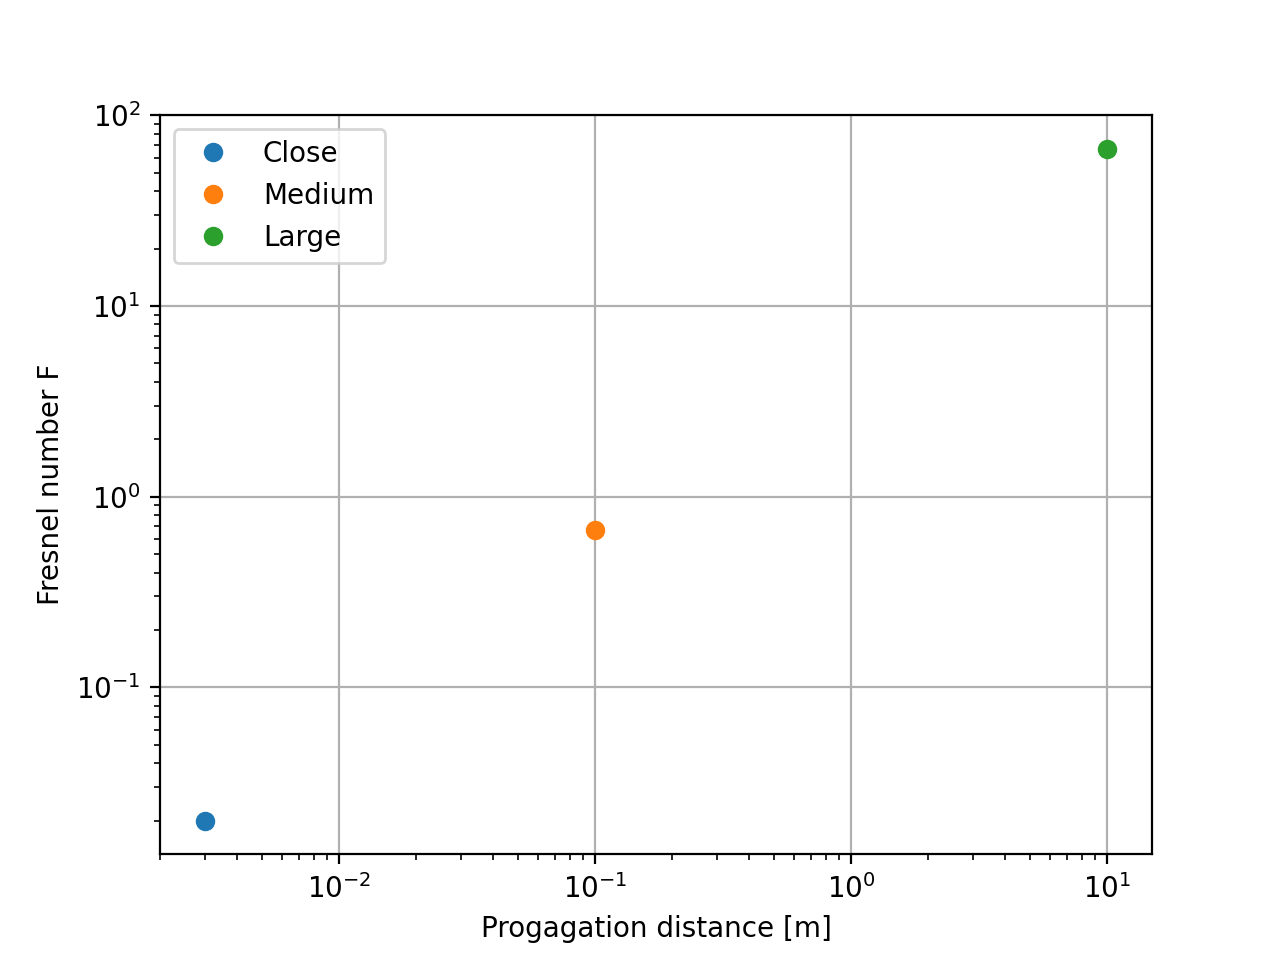

In [62]:
plt.figure()
plt.loglog(prop_dist, F_close, "o", label="Close")
plt.loglog(prop_dist_medium, F_medium, "o", label="Medium")
plt.loglog(prop_dist_large, F_large, "o", label="Large")
plt.xlabel("Progagation distance [m]")
plt.ylabel("Fresnel number F")
plt.grid()
plt.legend()

For $F \ll 1$, i.e. the propagation distance being much larger than the aperture size, we use [Fraunhofer diffraction](https://en.wikipedia.org/wiki/Fraunhofer_diffraction) instead of Fresnel propagation. You will learn about it in the next lecture.